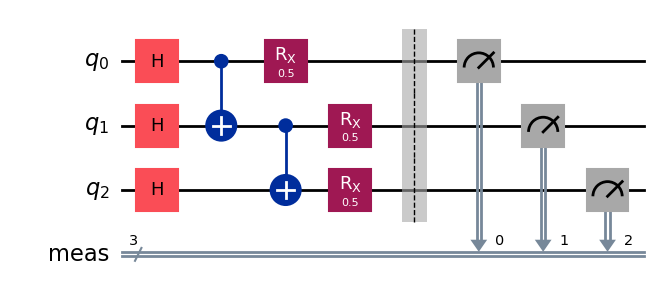

In [2]:
##--------------------------
## VQE Ansatz
##--------------------------

from qiskit import QuantumCircuit

# Define number of qubits
num_qubits = 3

def create_vqe_ansatz(num_qubits):
  circuit = QuantumCircuit(num_qubits)
  for qubit in range(num_qubits):
    circuit.h(qubit)  # Apply Hadamard gates to all qubits
  for i in range(num_qubits - 1):
    circuit.cx(i, i + 1)  # Apply CNOT gates across neighboring qubits
  for qubit in range(num_qubits):
    circuit.rx(0.5, qubit)  # Apply Ry rotations with parameter (can be changed to Rx or Rz)
  return circuit

# Generate the VQE Ansatz circuit
qc1 = create_vqe_ansatz(num_qubits)

# Measurement (measure all qubits for phase estimation)
qc1.measure_all()

# Print the circuit for visualization (optional)
qc1.draw(output='mpl')

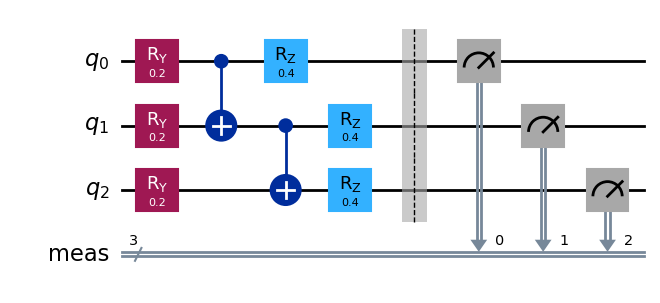

In [3]:
##--------------------------
## QAOA Ansatz
##--------------------------

# Define number of qubits
num_qubits = 3

def create_qaoa_ansatz(num_qubits):
  circuit = QuantumCircuit(num_qubits)
  for qubit in range(num_qubits):
    circuit.ry(thetas[qubit], qubit)  # Apply Ry rotations with trainable parameters (thetas)
  for i in range(num_qubits - 1):
    circuit.cx(i, i + 1)  # Apply CNOT gates across neighboring qubits
  for qubit in range(num_qubits):
    circuit.rz(phis[qubit], qubit)  # Apply Rz rotations with trainable parameters (phis)
  return circuit

# Define trainable parameters (replace with your specific optimization problem)
thetas = [0.2 for _ in range(num_qubits)]
phis = [0.4 for _ in range(num_qubits)]

# Generate the QAOA Ansatz circuit
qc2 = create_qaoa_ansatz(num_qubits)

# Measurement
qc2.measure_all()

# Print the circuit for visualization (optional)
qc2.draw(output='mpl')

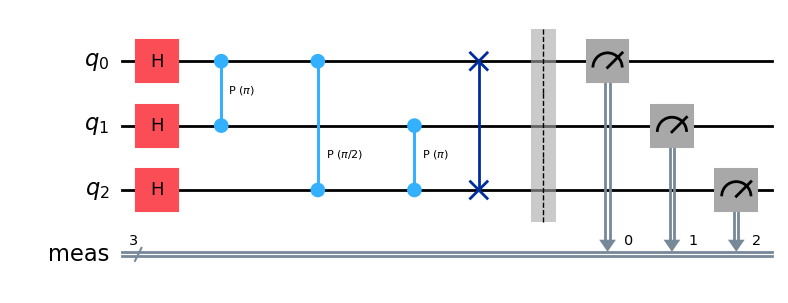

In [4]:
#------------------------------------
# Simple Quantum Fourior 
#------------------------------------

# Import necessary libraries
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import numpy as np

# Create a 4-qubit quantum circuit
num_qubits = 3
qc3 = QuantumCircuit(num_qubits)

# Apply Hadamard gates to all qubits
for qubit in range(num_qubits):
    qc3.h(qubit)

# Apply controlled phase shift gates (S and T gates)
for qubit in range(num_qubits):
    for j in range(qubit + 1, num_qubits):
        qc3.cp(2 * np.pi / 2**(j - qubit), j, qubit)

# Swap the first and 4th qubits
qc3.swap(0, 2)

# Measurement (measure all qubits for phase estimation)
qc3.measure_all()

# Visualize the circuit

qc3.draw(output='mpl')

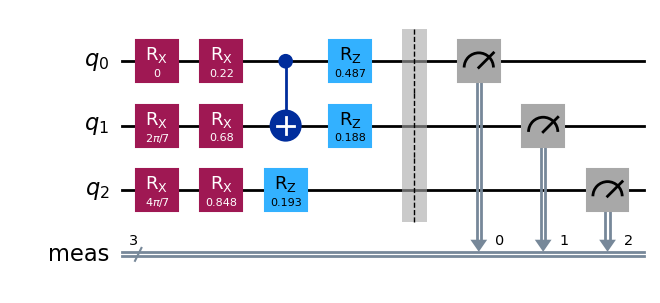

In [5]:
#--------------------
# Variational Ansatz
#--------------------

from qiskit import QuantumCircuit
import numpy as np

# Define the number of qubits
num_qubits = 3

# Create a QuantumCircuit object
qc4 = QuantumCircuit(num_qubits)

# Feature map (example for binary data)
for i in range(num_qubits):
  qc4.rx(2 * i * np.pi / (2**num_qubits - 1), i)  # Encode data using Ry rotations

# Variational Ansatz (example)
for qubit in range(num_qubits):
  qc4.rx(np.random.rand(), qubit)  # Random Ry rotations (replace for complexity)
qc4.cx(0, 1)  # CNOT gate
for qubit in range(num_qubits):
  qc4.rz(np.random.rand(), qubit)  # R, 0andom Rz rotations (replace for complexity)

# Measurement (measure all qubits for phase estimation)
qc4.measure_all()

# Print the circuit using the mpl output format (requires matplotlib
qc4.draw(output='mpl')

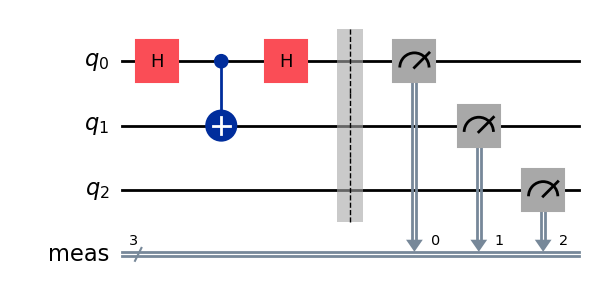

In [6]:
##--------------------------
##Deutsch-Jozsa Algorithm:
##--------------------------

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

# Define number of qubits
num_qubits = 3

# Create Quantum Circuit
qc5 = QuantumCircuit(num_qubits)

# Apply Hadamard gate to the first qubit (state preparation)
qc5.h(0)

# Apply the function f (replace with your specific function)
qc5.cx(0, 1)  # Example function (replace for constant or balanced)

# Apply Hadamard gate to the first qubit again
qc5.h(0)

# Measurement (measure all qubits for phase estimation)
qc5.measure_all()

# Transpile the circuit for a specific backend (replace with your desired backend)
#aer_backend = Aer.get_backend('qasm_simulator')
#transpiled_circuit = transpile(qc5, aer_backend)

# Print the circuit using the mpl output format (requires matplotlib)
qc5.draw(output='mpl')


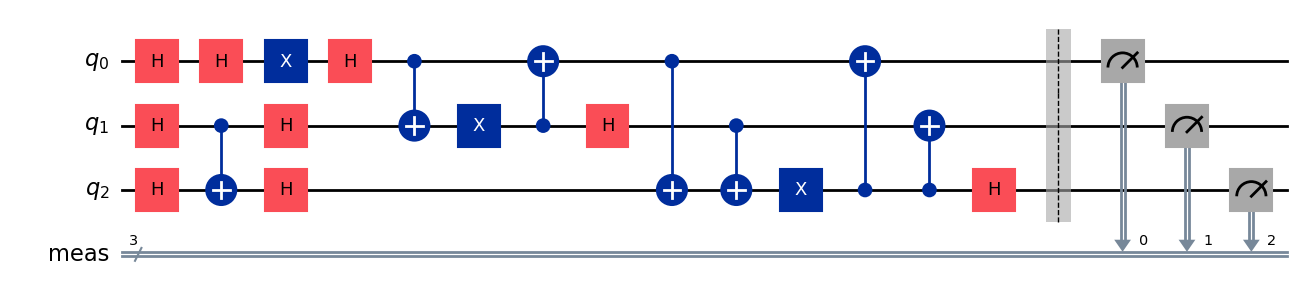

In [7]:
##--------------------------
##2. Grover's Search:
##--------------------------

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

# Define number of qubits (enough to represent database size)
num_qubits = 3
# Create Quantum Circuit
qc6 = QuantumCircuit(num_qubits)

# Oracle function (replace with your logic to identify the target state)
def oracle(qc6, target):
  for i in range(num_qubits):
    if i == target:
      qc6.cx(control_qubit=i, target_qubit=num_qubits-1)

# Apply superposition (all qubits in |+\>)
for i in range(num_qubits):
  qc6.h(i)

# Apply the oracle function (replace target with your search item index)
oracle(qc6, 1)  # Example: searching for item at index 1

# Grover's diffusion operator
for i in range(num_qubits):
  qc6.h(i)
  for j in range(i):
    qc6.cx(j, i)  # Controlled-NOT gates
  qc6.x(i)  # Apply NOT gate
  for j in range(i):
    qc6.cx(i, j)  # Controlled-NOT gates
  qc6.h(i)

# Measurement (measure all qubits for phase estimation)
#for i in range(num_qubits):
qc6.measure_all()

# Transpile the circuit for a specific backend (replace with your desired backend)
#aer_backend = Aer.get_backend('qasm_simulator')
#transpiled_circuit = transpile(qc, aer_backend)

# Print the circuit using the mpl output format (requires matplotlib)
qc6.draw(output='mpl')


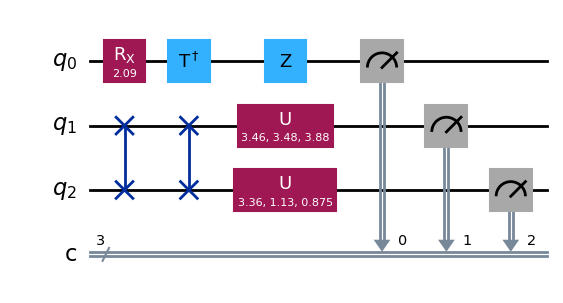

In [10]:
##--------------------------------------
## A random circuit for benchmarking
##--------------------------------------

from qiskit.circuit.random import random_circuit
 
qc7 = random_circuit(3, 3, measure=True)
qc7.draw(output='mpl')


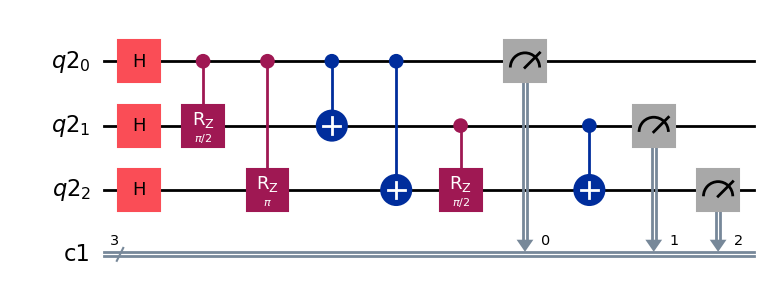

In [9]:
#--------------------
## Quantum Fourier Transform
##---------------------------

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer

# Define the number of qubits
n = 3

# Create quantum and classical registers
qr = QuantumRegister(n)
cr = ClassicalRegister(n)

# Build the quantum circuit
qc8 = QuantumCircuit(qr, cr)

# Apply Hadamard gates to all qubits
for i in range(n):
  qc8.h(qr[i])

# Implement the QFT recursively using controlled rotations
def qft_loop(qc, qubits):
  n = len(qubits)
  for i in range(n):
    for j in range(i + 1, n):
      # Apply Rz rotations
      qc.crz(2*np.pi * 2**(j-i) / (2**n), qubits[i], qubits[j])
    # Apply controlled phase shifts
    for j in range(i + 1, n):
      qc8.cx(qubits[i], qubits[j])

# Apply recursive QFT function
qft_loop(qc8, qr)

# Measure all qubits in the computational basis
for i in range(n):
  qc8.measure(qr[i], cr[i])

# Print the circuit
#print(qc)

# Visualize the circuit
qc8.draw(output='mpl')

In [14]:
import csv
import numpy as np
import pprint

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers import BackendV1
from qiskit.quantum_info import Pauli, PauliList, SparsePauliOp
from qiskit.result import sampled_expectation_value
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeProvider

import mapomatic as mm 

# Constants for filtering backends
MIN_QUBITS = 3
EXCLUDED_BACKENDS = [
    'fake_burlington', 
    'fake_almaden',                                                              
    'fake_cambridge',                                                
    'fake_boeblingen',                                                          
    'fake_essex',                                                        
    'fake_johannesburg',                                                        
    'fake_london',                                                         
    'fake_melbourne',                                                        
    'fake_poughkeepsie',                                                          
    'fake_rochester',                                                         
    'fake_rueschlikon',                                                        
    'fake_singapore',                                                         
    'fake_tenerife',                                                         
    'fake_tokyo']

# *** Main Execution ***

def get_filtered_backends():
    """Retrieves available backends and applies filtering criteria."""
    all_backends = FakeProvider().backends()
    return [
        backend 
        for backend in all_backends 
        if backend.configuration().n_qubits >= MIN_QUBITS 
           and backend.name() not in EXCLUDED_BACKENDS
    ]

def calculate_expectation_value(circuit, backend, noise_model):
    """Calculates the expectation value of a circuit on a given backend."""
    transpiled_circuit = transpile(circuit, backend, optimization_level=3)  # Consider a default optimization level, will be overriden in runtime
    job = backend.run(transpiled_circuit, noise_model=noise_model)
    result = job.result()
    return sampled_expectation_value(result.get_counts(circuit), observable1)

# Get circuit objects (replace placeholders like qc1)
circuits_to_transpile = [qc1, qc2, qc3, qc4, qc5, qc6, qc7, qc8] 

# Define optimization levels to explore
optimization_levels = [0, 1, 2, 3]

# Define #of iterations
num_runs=10

# Define the Pauli observable (consider making this an input parameter)
observable1 = Pauli("ZZZ")

# Prepare the output CSV file
with open("circuit_results.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Circuit", "Run-ID", "Backend", "ExpectationValue", "MapomaticScore", "OptimizationLevel"])

    backends = get_filtered_backends()

    for backend in backends:
        print(f"Processing backend: {backend.name()}")

        # Handle potential missing noise model
        try:
            noise_model = NoiseModel.from_backend(backend)
        except AttributeError:
            print(f"Backend {backend.name} does not support noise model retrieval.")
            noise_model = None

        for circuit in circuits_to_transpile:
            for optimization_level in optimization_levels:
                transpiled_circuit = transpile(circuit, backend, optimization_level=optimization_level)
                circuit_name = circuit.name

                # Mapomatic calculations
                deflated_circuit = mm.deflate_circuit(transpiled_circuit)
                layouts = mm.matching_layouts(deflated_circuit, backend)
                mapomatic_scores = mm.evaluate_layouts(deflated_circuit, layouts, backend)
                best_score = max(mapomatic_scores, key=lambda item: item[1])[1]  # Get the best Mapomatic score

                for run_id in range(num_runs):
                    expectation_value = calculate_expectation_value(circuit, backend, noise_model)            
                    writer.writerow([circuit_name, run_id + 1, backend.name(), expectation_value, best_score, optimization_level])


Processing backend: fake_athens
Processing backend: fake_belem
Processing backend: fake_bogota
Processing backend: fake_brooklyn
Processing backend: fake_cairo
Processing backend: fake_casablanca
Processing backend: fake_guadalupe
Processing backend: fake_hanoi
Processing backend: fake_jakarta
Processing backend: fake_kolkata
Processing backend: fake_lagos
Processing backend: fake_lima
Processing backend: fake_manila
Processing backend: fake_manhattan
Processing backend: fake_montreal
Processing backend: fake_mumbai
Processing backend: fake_nairobi
Processing backend: fake_ourense
Processing backend: fake_paris
Processing backend: fake_quito
Processing backend: fake_rome
Processing backend: fake_santiago
Processing backend: fake_sydney
Processing backend: fake_toronto
Processing backend: fake_valencia
Processing backend: fake_vigo
Processing backend: fake_washington
Processing backend: fake_yorktown



Best parameters for LinearRegression: {}

LinearRegression Results:
  MSE: 0.1221
  R-squared: 0.0039
  MAE: 0.2175


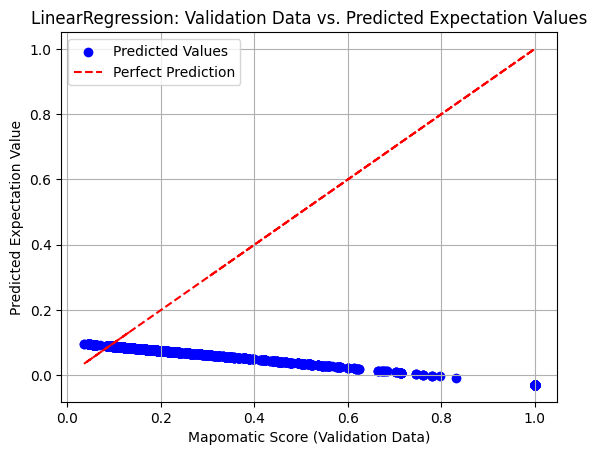

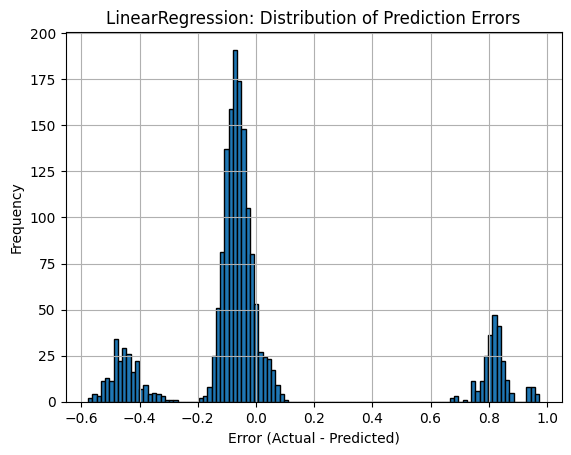


Best parameters for SVR: {'C': 1, 'kernel': 'rbf'}

SVR Results:
  MSE: 0.1240
  R-squared: -0.0118
  MAE: 0.2039


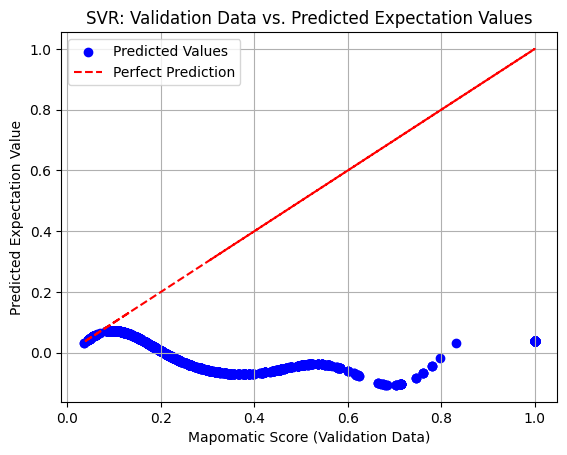

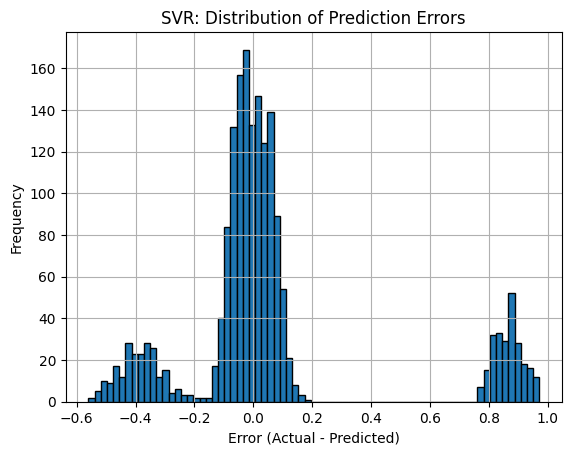


Best parameters for RandomForestRegressor: {'n_estimators': 200}

RandomForestRegressor Results:
  MSE: 0.0107
  R-squared: 0.9128
  MAE: 0.0379


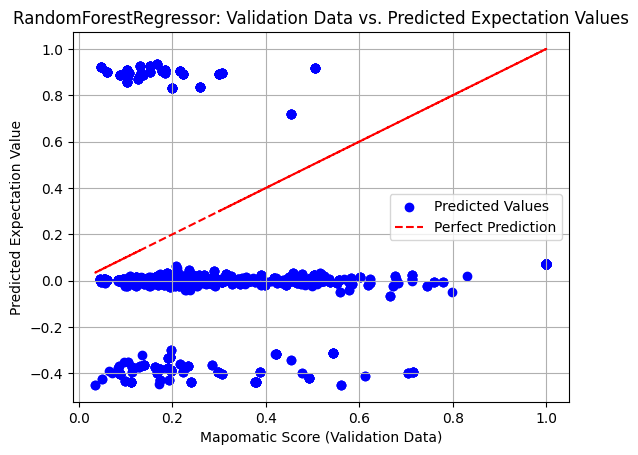

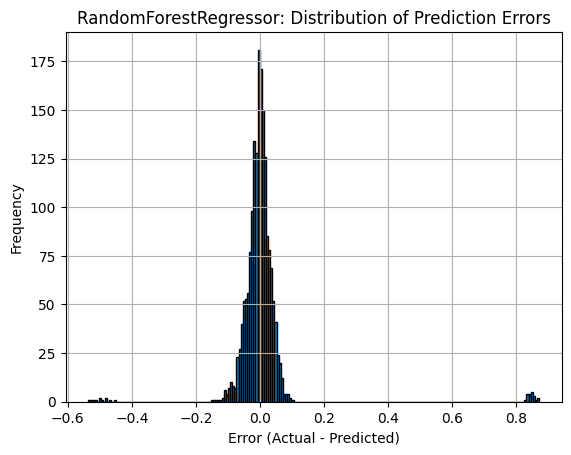


Best parameters for GradientBoostingRegressor: {'n_estimators': 200}

GradientBoostingRegressor Results:
  MSE: 0.0244
  R-squared: 0.8007
  MAE: 0.0939


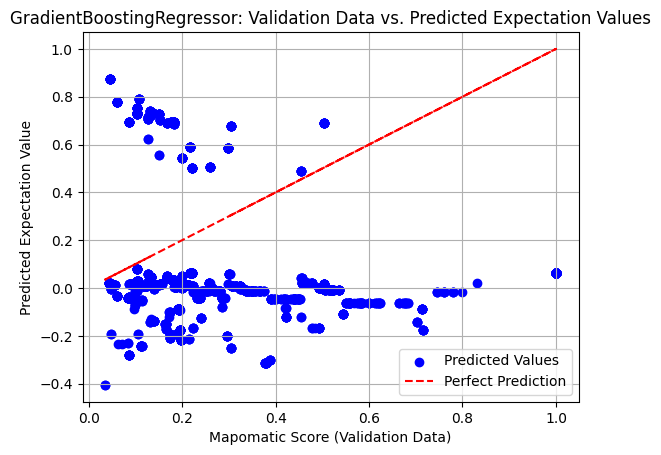

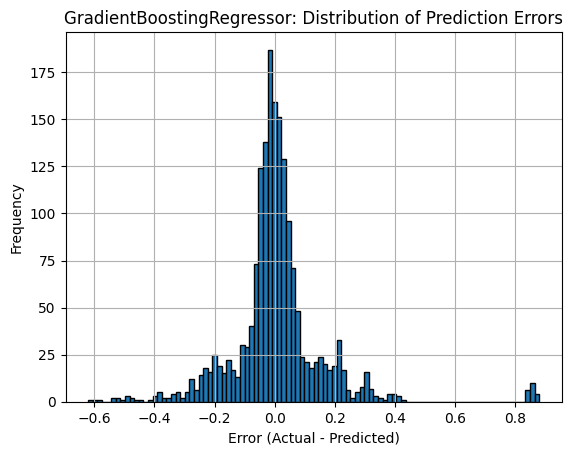

In [26]:
    from sklearn.model_selection import train_test_split, GridSearchCV
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    import matplotlib.pyplot as plt
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    from sklearn.svm import SVR
    from sklearn.ensemble import GradientBoostingRegressor
    
    
    # Load data from CSV, skipping the first row (assuming headers) and ignoring "Run Id"
    data = pd.read_csv("circuit_results.csv")
    
    # Drop "Run Id" column if it exists but was not skipped
    if "Run-Id" in data.columns:
        data.drop("Run-Id", axis=1, inplace=True)
    
    # Separate features and target variable
    X = data[["MapomaticScore"]]
    y = data["ExpectationValue"]
    
    # Split data into training and validation sets (80% training, 20% validation)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define models with their hyperparameter grids
    models = {
    "LinearRegression": (LinearRegression(), {}),  
    "SVR": (SVR(), {"kernel": ['rbf'], "C": [1, 10, 100]}),
    "RandomForestRegressor": (RandomForestRegressor(), {"n_estimators": [50, 100, 200]}),
    "GradientBoostingRegressor": (GradientBoostingRegressor(), {"n_estimators": [50, 100, 200]})
    }

    # Train models and optimize hyperparameters
    for name, (model, param_grid) in models.items():
        grid_search = GridSearchCV(model, param_grid, cv=5)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        print(f"\nBest parameters for {name}: {grid_search.best_params_}")

        # Evaluation and visualization within the loop
        predictions = best_model.predict(X_val)

        mse = mean_squared_error(y_val, predictions)
        r2 = r2_score(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)

        print(f"\n{name} Results:")
        print(f"  MSE: {mse:.4f}")
        print(f"  R-squared: {r2:.4f}")
        print(f"  MAE: {mae:.4f}")
    
        # Scatter Plot
        plt.figure()  # Create a new figure for each model's graph
        plt.scatter(X_val["MapomaticScore"], predictions, color='blue', label='Predicted Values')
        plt.plot(X_val["MapomaticScore"], X_val["MapomaticScore"], color='red', linestyle='--', label='Perfect Prediction')
        plt.xlabel("Mapomatic Score (Validation Data)")
        plt.ylabel("Predicted Expectation Value")
        plt.title(f"{name}: Validation Data vs. Predicted Expectation Values")  # Title specific to the model
        plt.legend()
        plt.grid(True)
        plt.show()
    
        # Error Distribution
        plt.figure()  # Create a new figure for error distribution
        errors = y_val - predictions
        plt.hist(errors, bins='auto', edgecolor='black')
        plt.xlabel("Error (Actual - Predicted)")
        plt.ylabel("Frequency")
        plt.title(f"{name}: Distribution of Prediction Errors")
        plt.grid(True)
        plt.show()

In [27]:
pip install nbconvert[webpdf]


   ---------------------------------------- 0.0/29.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/29.4 MB 660.6 kB/s eta 0:00:45
   ---------------------------------------- 0.1/29.4 MB 1.3 MB/s eta 0:00:23
   ---------------------------------------- 0.3/29.4 MB 2.8 MB/s eta 0:00:11
    --------------------------------------- 0.6/29.4 MB 3.5 MB/s eta 0:00:09
   - -------------------------------------- 1.1/29.4 MB 5.9 MB/s eta 0:00:05
   --- ------------------------------------ 2.3/29.4 MB 9.6 MB/s eta 0:00:03
   ---- ----------------------------------- 3.2/29.4 MB 12.1 MB/s eta 0:00:03
   ----- ---------------------------------- 4.3/29.4 MB 13.8 MB/s eta 0:00:02
   ------- -------------------------------- 5.6/29.4 MB 15.7 MB/s eta 0:00:02
   ---------- ----------------------------- 7.5/29.4 MB 17.7 MB/s eta 0:00:02
   ----------- ---------------------------- 8.7/29.4 MB 19.2 MB/s eta 0:00:02
   ------------- -------------------------- 10.2/29.4 MB 20.3 MB/s eta 0:00: